# Problems

## Problem 1: Basic Binary Classification Neuron

**Task**: *Construct a single neuron to determine if a number is positive or negative. And calculate the output for $x = 2$ and $x = -1$.*

**Hints**: 
- *Inputs*: Single feature, a real number \( x \).
- *Weights and Bias*: Initialize weight \( w = 1.0 \) and bias \( b = 0 \).
- *Activation Function*: Use the sigmoid function to output a probability.

### Solution to Problem 1

We use a binary classification neuron with the sigmoid activation function to classify whether an input  $x$ is positive or negative, producing outputs between $0$ and $1$ to indicate the input’s sign and relative strength.

Here $w=1$ and $b=0$, so using the mathematical model of a neuron, we get:<br>

$
\begin{aligned}
\text{neuron}(x) &= \text{sigmoid}(w \cdot x + b) \\
&= \text{sigmoid}(1 \cdot x + 0) \\
&= \text{sigmoid}(x)\\
&= \frac{1}{1+e^{-x}}
\end{aligned}
$

Now, the main thing we want to construct is a single neuron that can determine if a number is positive or negative.

If we look at the graph of sigmoid function, we see that at $x=0$, it takes the value $\frac{1}{1+e^{-0}}$ which is $\frac{1}{2}$. And we can verify that:

$
\begin{aligned}
x_{1} \leq x_{2}&\Rightarrow  -x_{1} \geq -x_{2}\\
&\Rightarrow  e^{-x_{1}} \geq e^{-x_{2}}\\
&\Rightarrow  1+e^{-x_{1}} \geq 1+e^{-x_{2}}\\
&\Rightarrow \frac{1}{1+e^{-x_{1}}}\leq\frac{1}{1+e^{-x_{2}}}\\
&\Rightarrow \text{sigmoid}(x_{1})\leq\text{sigmoid}(x_{2})
\end{aligned}
$

This shows that $\text{sigmoid}(x)$ is monotonically increasing function and, thus, <br>
- $\frac{1}{2}\leq \text{sigmoid}(x) \leq 1$ if $x$ is positive and,<br>
- $0\leq \text{sigmoid}(x) \leq \frac{1}{2}$ if $x$ is negative.

I can now say that, the output of $x=2$ lies in the interval $\left(\frac{1}{2},1\right)$
And the output of $x=-1$ lies in the interval $\left(0,\frac{1}{2}\right)$.

In conclusion, this binary classification neuron effectively uses the sigmoid function to distinguish between positive and negative inputs. By mapping input values to a smooth, continuous range between $0$ and $1$, the neuron provides an intuitive output that reflects both the direction and magnitude of the input. Positive inputs yield outputs above  $\frac{1}{2}$, approaching $1$ as they increase, while negative inputs yield outputs below  $\frac{1}{2}$, approaching $0$ as they decrease. This not only indicates the sign of the input but also shows how strongly positive or negative the value is. This simple yet powerful model showcases how the sigmoid function’s properties make it ideal for binary classification tasks, providing insights into the nature of the input based on the output range.

We can also get the exact values using the code snippet given below.

Output for x = 2 is  0.8807970779778823
Output for x = -1 is  0.2689414213699951


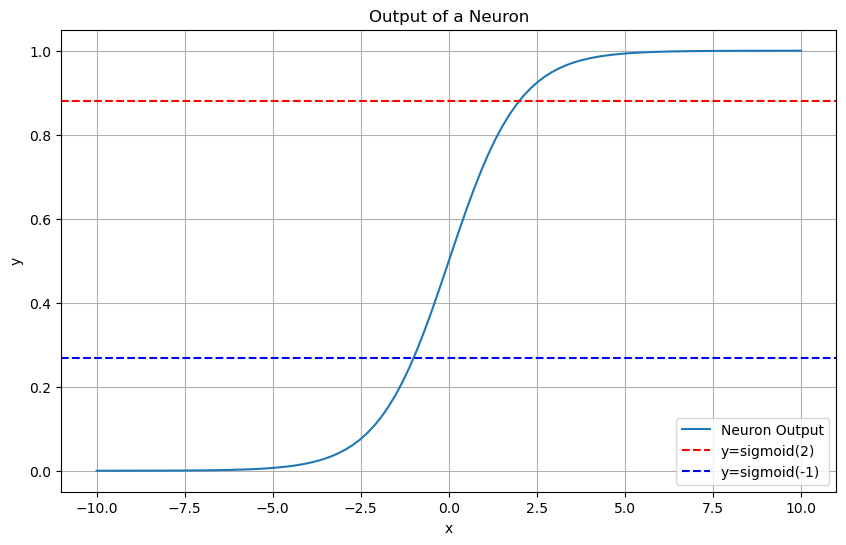

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#Print the output of the neuron for x=2 and x=-1
print(f"Output for x = 2 is ", sigmoid(2))
print(f"Output for x = -1 is ", sigmoid(-1))   

#Plot the output of the neuron for different values of x
plt.figure(figsize=(10,6))
x = np.linspace(-10, 10, 100)
y = sigmoid(x)
plt.plot(x, y, label='Neuron Output')
plt.axhline(y=sigmoid(2), color='r', linestyle='--', label="y=sigmoid(2)")  
plt.axhline(y=sigmoid(-1), color='b', linestyle='--', label="y=sigmoid(-1)")  
plt.xlabel('x')
plt.ylabel('y')
plt.title('Output of a Neuron')
plt.legend()
plt.grid()
plt.show()

## Problem 2: Comparing Activation Functions with a Pattern Analysis

**Task**: *Investigate how three different activation functions respond to a range of inputs, simulating the behavior of neurons as light bulbs controlled by smart switches*

*Note*: This exercise aims to vividly illustrate how different neural "control mechanisms" (activation functions) interpret and respond to the same range of inputs by varying the simulated "light intensity" of neurons. The comparison should help deduce patterns and understand the suitability of each function for different types of tasks in neural networks.

**Hints**:
- *Setup*:
  - *Inputs*: Use a series of inputs ranging from -2.0 to 2.0 in increments of 0.5 to simulate varying electrical currents.
  - *Weights and Bias*: Assume a weight \( w = 1.0 \) and a bias \( b = 0.5 \), which together determine the net input to the neuron.

- *Activation Functions*: Analyze the outputs using sigmoid, tanh, and ReLU functions.
  - *Sigmoid Function*: Simulates a precise dimmer switch that controls the brightness subtly, preventing the light from ever being fully off or fully bright, but adjusting smoothly.
  - *Tanh Function*: Acts like a dimmer that can also go negative (dim to dark), representing zero output as complete darkness.
  - *ReLU Function*: Represents a simple on/off switch, turning the light on only if the input (after weight and bias adjustment) is positive.

- *Task*:
  - *Calculation*: For each input in the series, calculate the output using each of the three activation functions.
  - *Visualization*: Plot the resulting outputs for each activation function on the same graph to visually compare how the light bulb's brightness changes across the input range.
  - *Discussion*: Interpret the plots to describe how each activation function would control the "firing" of a neuron (light bulb). Discuss the practical implications of these differences in handling signals in a neural network.

### Solution to Problem 2

### Problem 3: Output Behavior for Different Inputs
**Task**: Model a neuron that predicts whether an object's size is above or below a threshold.
- **Inputs**: Single feature representing size (e.g., \( x = 10 \)).
- **Weights and Bias**: Assume \( w = 0.1 \) and \( b = -1 \).
- **Activation Function**: Use the sigmoid function to model the output.
- **Task**: Describe how the output of the neuron changes as the size value varies from 5 to 15.

### Problem 4: Impact of Bias in Activation
**Task**: Explore the impact of varying the bias on a neuron's output with a fixed input.
- **Inputs**: Assume \( x = 2.0 \).
- **Weights and Bias**: Use \( w = 1.5 \) and experiment with different bias values \( b = -1, 0, 1 \).
- **Activation Function**: Use the ReLU function.
- **Task**: Calculate and compare the outputs for each bias setting, discussing the role of bias in modulating the neuron's activation.

These problems help you understand how single neurons function, focusing on the basics of input processing, weight and bias effects, and how activation functions shape the neuron's output. They provide a practical introduction to neural network fundamentals without delving into more complex network architectures.